In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

import torch
import torch.nn as nn



In [3]:
if torch.cuda.is_available():
    num_devices = torch.cuda.device_count()
    print(f"Number of CUDA devices: {num_devices}\n")

    for i in range(num_devices):
        device_name = torch.cuda.get_device_name(i)
        total_memory = torch.cuda.get_device_properties(i).total_memory / 1e9  # in GB
        print(f"Device {i}: {device_name} ({total_memory:.2f} GB)")

Number of CUDA devices: 1

Device 0: NVIDIA GeForce RTX 3070 (8.59 GB)


In [4]:
print("CUDA available:", torch.cuda.is_available())

CUDA available: True


In [5]:
def generate_triangle(width, height):
    points = np.array(
        [[random.randint(int(-width * 0.1), int(width * 1.1)), random.randint(int(-height * 0.1), int(height * 1.1))]
         for _ in range(3)], dtype=np.int32)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return "polygon", (points, color)


def generate_rectangle(width, height):
    points = np.array(
        [[random.randint(int(-width * 0.1), int(width * 1.1)), random.randint(int(-height * 0.1), int(height * 1.1))]
         for _ in range(4)], dtype=np.int32)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return "polygon", (points, color)


def generate_ellipse(width, height):
    center = (random.randint(int(-width * 0.1), int(width * 1.1)),
              random.randint(int(-height * 0.1), int(height * 1.1)))
    axes = (random.randint(50, width // 2), random.randint(50, height // 2))
    angle = random.randint(0, 360)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return "ellipse", (center, axes, angle, color)


def generate_star(width, height):
    center = (random.randint(0, width), random.randint(0, height))
    points = np.array(
        [[random.randint(int(-width * 0.1), int(width * 1.1)), random.randint(int(-height * 0.1), int(height * 1.1))]
         for _ in range(random.choice([4, 5]))], dtype=np.int32)
    color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    return "star", (center, points, color)


def generate_image(width, height, num_triangles, num_rectangles, num_ellipses, num_stars):
    bg_color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    img = np.full((height, width, 3), bg_color, dtype=np.uint8)

    shapes = []

    for _ in range(num_triangles):
        shapes.append(generate_triangle(width, height))
    for _ in range(num_rectangles):
        shapes.append(generate_rectangle(width, height))
    for _ in range(num_ellipses):
        shapes.append(generate_ellipse(width, height))
    for _ in range(num_stars):
        shapes.append(generate_star(width, height))

    random.shuffle(shapes)

    for shape_type, params in shapes:
        if shape_type == "polygon":
            points, color = params
            cv2.fillPoly(img, [points], color)
        elif shape_type == "ellipse":
            center, axes, angle, color = params
            cv2.ellipse(img, center, axes, angle, 0, 360, color, -1)
        elif shape_type == "star":
            center, points, color = params
            for point in points:
                cv2.line(img, center, tuple(point), color, 1, cv2.LINE_AA)

    return img

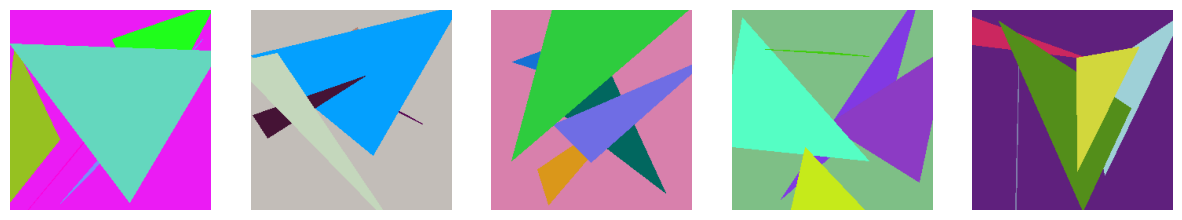

In [6]:
images = [generate_image(256, 256, 5, 0, 0, 0) for _ in range(5)]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(images[i])
    ax.set_axis_off()

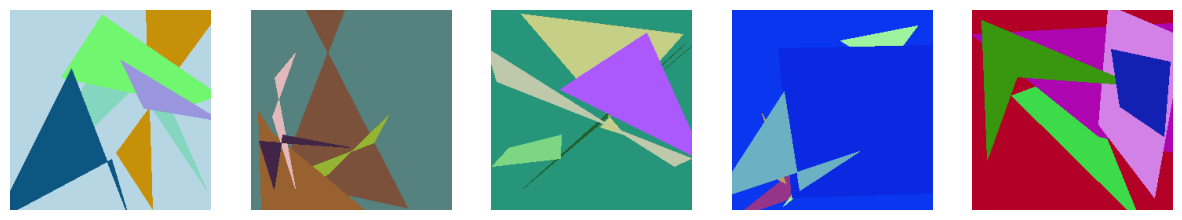

In [7]:
images = [generate_image(256, 256, 0, 5, 0, 0) for _ in range(5)]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(images[i])
    ax.set_axis_off()

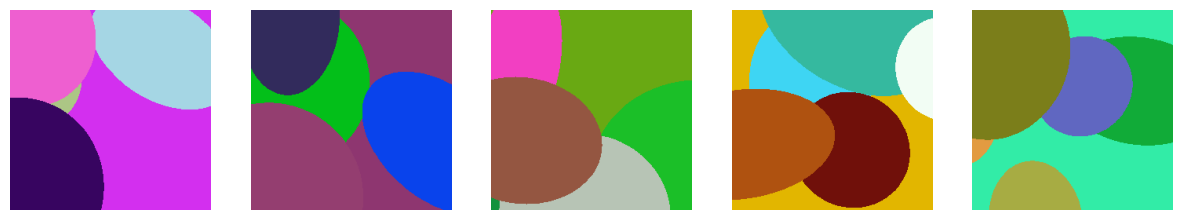

In [8]:
images = [generate_image(256, 256, 0, 0, 5, 0) for _ in range(5)]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(images[i])
    ax.set_axis_off()

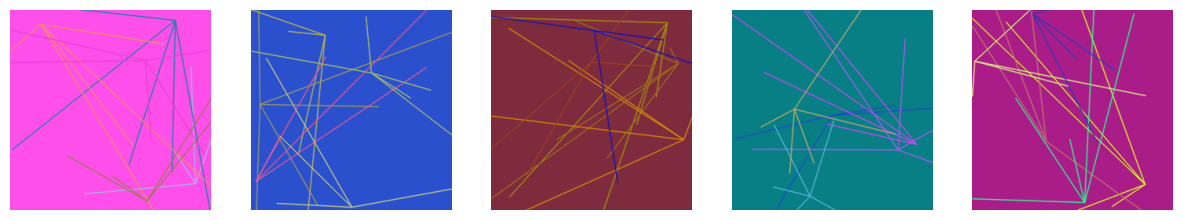

In [9]:
images = [generate_image(256, 256, 0, 0, 0, 5) for _ in range(5)]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(images[i])
    ax.set_axis_off()

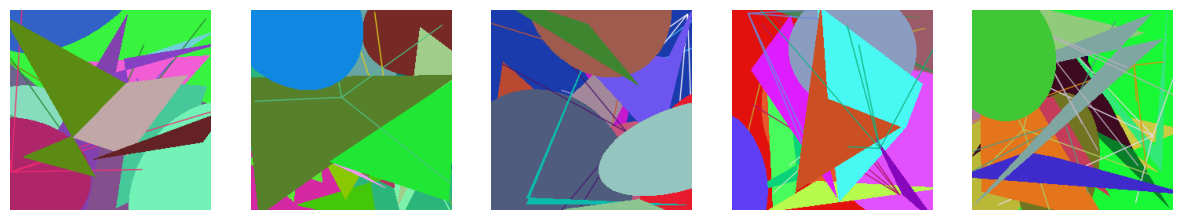

In [10]:
images = [generate_image(256, 256, 5, 5, 5, 5) for _ in range(5)]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(images[i])
    ax.set_axis_off()

In [11]:
def noise_add(image, sigma=None):
    if sigma is None:
        sigma = random.uniform(0.1, 0.3)
    noisy = image.astype(np.float32) + np.random.normal(0, sigma * 255, image.shape)
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy


def noise_mul(image, sigma=None):
    if sigma is None:
        sigma = random.uniform(0.1, 0.3)
    noisy = image.astype(np.float32) * np.random.normal(1, sigma, image.shape)
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

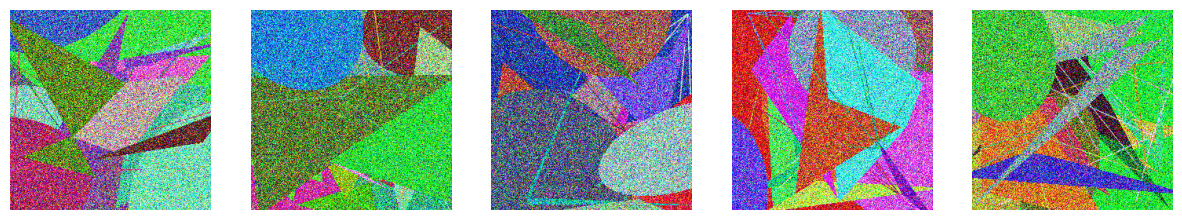

In [12]:
# noisy_images_additive = [noise_add(img, random.uniform(0.1, 0.3)) for img in images]
noisy_images_additive = [noise_add(img, 0.3) for img in images]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(noisy_images_additive[i])
    ax.set_axis_off()

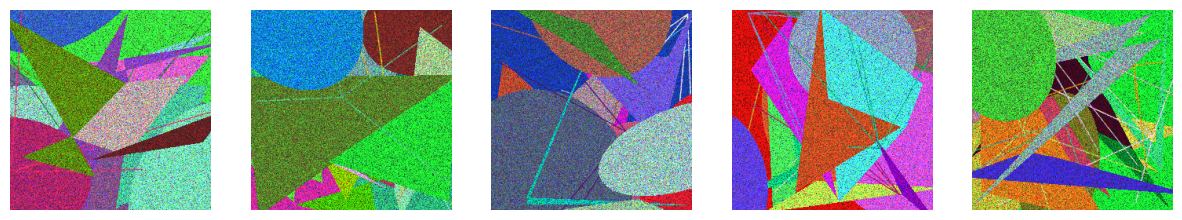

In [13]:
# noisy_images_multiplicative = [noise_mul(img, random.uniform(0.1, 0.3)) for img in images]
noisy_images_multiplicative = [noise_mul(img, 0.3) for img in images]

fig, ax_table = plt.subplots(1, 5, figsize=(15, 3), facecolor='none')
for i, ax in enumerate(ax_table.ravel()):
    ax.imshow(noisy_images_multiplicative[i])
    ax.set_axis_off()

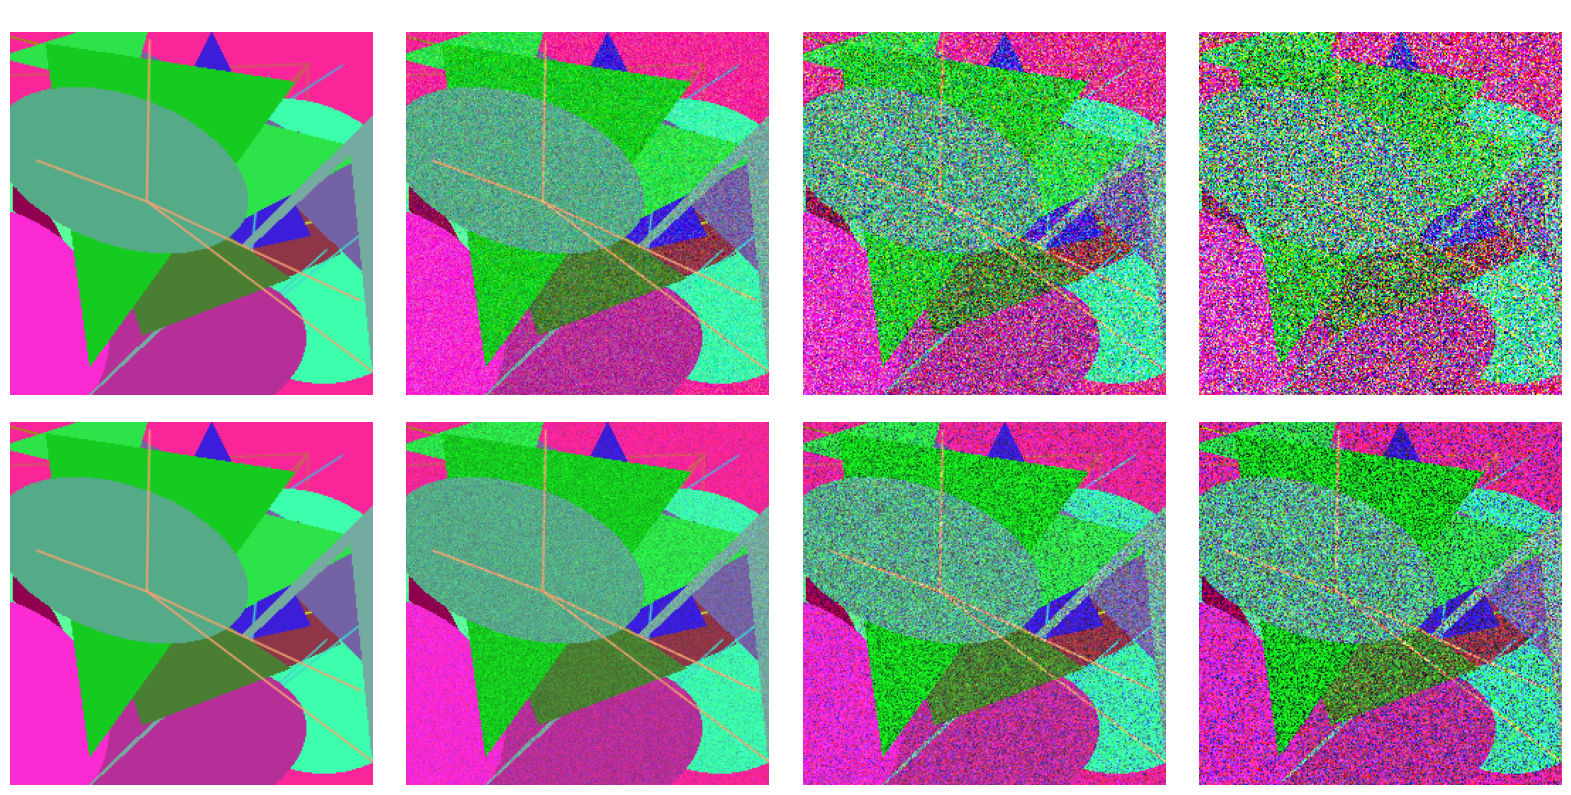

In [14]:
img = generate_image(256, 256, 5, 5, 5, 5)

noise_levels = [0.0, 0.1, 0.3, 0.5]
titles = ['No Noise', 'Noise 0.1', 'Noise 0.3', 'Noise 0.5']

fig, axes = plt.subplots(2, 4, figsize=(16, 8), facecolor='none')
for i, level in enumerate(noise_levels):
    if level == 0.0:
        axes[0, i].imshow(img)
    else:
        noisy = noise_add(img, level)
        axes[0, i].imshow(noisy)
    axes[0, i].set_title(f"Additive: {titles[i]}", color="white")
    axes[0, i].set_axis_off()

for i, level in enumerate(noise_levels):
    if level == 0.0:
        axes[1, i].imshow(img)
    else:
        noisy = noise_mul(img, level)
        axes[1, i].imshow(noisy)
    axes[1, i].set_title(f"Multiplicative: {titles[i]}", color="white")
    axes[1, i].set_axis_off()

plt.tight_layout()
plt.show()

In [15]:
class FilterBranch(nn.Module):
    def __init__(self):
        super(FilterBranch, self).__init__()
        self.R_conv = nn.Conv2d(1, 8, kernel_size=11, padding=5, bias=False)
        self.G_conv = nn.Conv2d(1, 8, kernel_size=11, padding=5, bias=False)
        self.B_conv = nn.Conv2d(1, 8, kernel_size=11, padding=5, bias=False)

    def forward(self, x):
        # x: (B, 3, H, W)
        R = x[:, 0:1, :, :]  # (B, 1, H, W)
        G = x[:, 1:2, :, :]
        B = x[:, 2:3, :, :]

        Rf = self.R_conv(R)  # (B, 8, H, W)
        Gf = self.G_conv(G)
        Bf = self.B_conv(B)

        # Združimo rezultate v (B, 3, 8, H, W)
        filtered = torch.stack([Rf, Gf, Bf], dim=1)
        return filtered  # (B, 3, 8, H, W)


In [16]:
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels=None, stride=1,
                 dropout_rate=0.1):
        super(ResNetBlock, self).__init__()
        out_channels = out_channels or in_channels  # če ni določeno, ohrani enako št. kanalov

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)

        self.dropout = nn.Dropout2d(p=dropout_rate)
        self.relu = nn.ReLU(inplace=True)

        if in_channels != out_channels or stride != 1:
            self.shortcut = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride)
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        residual = self.shortcut(x)

        out = self.conv1(x)
        out = self.dropout(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.dropout(out)
        out += residual

        out = self.relu(out)
        return out


In [17]:
class WeightBranch(nn.Module):
    def __init__(self, ):
        super(WeightBranch, self).__init__()

        self.resnet1 = ResNetBlock(3, 32)
        self.resnet2 = ResNetBlock(32, 32)
        self.resnet3 = ResNetBlock(32, 32)

        self.final_conv = nn.Conv2d(32, 8, kernel_size=1)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # x shape: (B, 3, H, W)
        x = self.resnet1(x)
        x = self.resnet2(x)
        x = self.resnet3(x)
        x = self.final_conv(x)  # -> (B, 8, H, W)
        weights = self.softmax(x)  # -> (B, 8, H, W)
        return weights


In [18]:
class EdgePreservingDenoiser(nn.Module):
    def __init__(self):
        super(EdgePreservingDenoiser, self).__init__()
        self.filter_branch = FilterBranch()
        self.weight_branch = WeightBranch()

    def forward(self, x):
        # x shape: (B, 3, H, W)
        filtered = self.filter_branch(x)  # (B, 3, 8, H, W)
        weights = self.weight_branch(x)  # (B, 8, H, W)

        # Združi veje za vsak barvni kanal
        # Razširi weights za 3 kanale: (B, 1, 8, H, W)
        weights = weights.unsqueeze(1)  # (B, 1, 8, H, W)

        # Pomnožimo in seštejemo po 8 filtrih
        output = (filtered * weights).sum(dim=2)  # (B, 3, H, W)
        output = torch.clamp(output, 0.0, 1.0)

        return output

In [19]:
import torchinfo
import torch.optim as optim
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

model = EdgePreservingDenoiser().to(device)

optimizer = optim.AdamW(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

num_epochs = 1000
batch_size = 40
num_samples = 1000

noise_fn = noise_add
# noise_fn = noise_mul

model_file_name = f"denoiser_bs{batch_size}_ep{num_epochs}_{noise_fn.__name__}.pth"

print(torchinfo.summary(model, [1, 3, 256, 256]))


Device:  cuda
Layer (type:depth-idx)                   Output Shape              Param #
EdgePreservingDenoiser                   [1, 3, 256, 256]          --
├─FilterBranch: 1-1                      [1, 3, 8, 256, 256]       --
│    └─Conv2d: 2-1                       [1, 8, 256, 256]          968
│    └─Conv2d: 2-2                       [1, 8, 256, 256]          968
│    └─Conv2d: 2-3                       [1, 8, 256, 256]          968
├─WeightBranch: 1-2                      [1, 8, 256, 256]          --
│    └─ResNetBlock: 2-4                  [1, 32, 256, 256]         --
│    │    └─Conv2d: 3-1                  [1, 32, 256, 256]         128
│    │    └─Conv2d: 3-2                  [1, 32, 256, 256]         896
│    │    └─Dropout2d: 3-3               [1, 32, 256, 256]         --
│    │    └─ReLU: 3-4                    [1, 32, 256, 256]         --
│    │    └─Conv2d: 3-5                  [1, 32, 256, 256]         9,248
│    │    └─Dropout2d: 3-6               [1, 32, 256, 256]     

In [20]:
from torch.utils.data import Dataset, DataLoader


class SyntheticNoiseDataset(Dataset):
    def __init__(self, num_samples=1000, noise_fn=noise_add, noise_range=(0.1, 0.3)):
        self.clean = []
        self.noisy = []
        for _ in range(num_samples):
            img = generate_image(256, 256, 5, 5, 5, 5)
            noisy = noise_fn(img, np.random.uniform(*noise_range))
            self.clean.append(torch.tensor(img.transpose(2, 0, 1), dtype=torch.float32))
            self.noisy.append(torch.tensor(noisy.transpose(2, 0, 1), dtype=torch.float32))

    def __len__(self):
        return len(self.clean)

    def __getitem__(self, idx):
        return self.noisy[idx], self.clean[idx]


In [21]:
import os
import re

def extract_epoch(filename):
    match = re.search(r"epoch_(\d+)", filename)
    return int(match.group(1)) if match else -1

def nn_train(model, num_epochs, model_file_name, train_loader, optimizer, criterion, checkpoint_dir="checkpoints"):
    os.makedirs(checkpoint_dir, exist_ok=True)
    start_epoch = 0

    # 🔄 Resume if checkpoint exists
    checkpoints = sorted([f for f in os.listdir(checkpoint_dir) if f.endswith(".pth")])
    checkpoints = sorted(checkpoints, key=extract_epoch)
    if checkpoints:
        latest_ckpt = os.path.join(checkpoint_dir, checkpoints[-1])
        checkpoint = torch.load(latest_ckpt, map_location=device)
        model.load_state_dict(checkpoint["model_state_dict"])
        optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
        start_epoch = checkpoint["epoch"]
        print(f"✅ Resuming from checkpoint: {latest_ckpt} (epoch {start_epoch})")
    else:
        print("🚀 Starting training from scratch.")

    # 🔁 Training loop
    for epoch in range(start_epoch, num_epochs):
        model.train()
        epoch_loss = 0.0
        for noisy_batch, clean_batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
            noisy_batch, clean_batch = noisy_batch.to(device), clean_batch.to(device)
            optimizer.zero_grad()
            output = model(noisy_batch)
            loss = criterion(output, clean_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        print(f"Epoch {epoch + 1} - Avg loss: {avg_loss:.6f}")

        # 💾 Save checkpoint every 1000 epochs
        if (epoch + 1) % 500 == 0 or (epoch + 1) == num_epochs:
            checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch + 1}.pth")
            torch.save({
                "epoch": epoch + 1,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "loss": avg_loss,
            }, checkpoint_path)
            print(f"💾 Saved checkpoint: {checkpoint_path}")

            # 🧹 Keep only last 2 checkpoints
            checkpoints = sorted([f for f in os.listdir(checkpoint_dir) if f.endswith(".pth")])
            checkpoints = sorted(checkpoints, key=extract_epoch)
            while len(checkpoints) > 4:
                old_ckpt = os.path.join(checkpoint_dir, checkpoints[0])
                os.remove(old_ckpt)
                print(f"🗑️ Removed old checkpoint: {old_ckpt}")
                checkpoints.pop(0)

    # ✅ Save final model
    torch.save(model.state_dict(), model_file_name)
    print("✅ Final model saved:", model_file_name)

    # 🧹 Clear GPU cache
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        print(f"🧹 GPU memory cleared. Current allocated: {torch.cuda.memory_allocated(device) / 1e9:.2f} GB")


def check_gpu_memory():
    """Check current GPU memory usage"""
    if torch.cuda.is_available():
        allocated = torch.cuda.memory_allocated(device) / 1e9
        reserved = torch.cuda.memory_reserved(device) / 1e9
        total = torch.cuda.get_device_properties(device).total_memory / 1e9
        print(f"GPU Memory Status:")
        print(f"  Allocated: {allocated:.2f} GB")
        print(f"  Reserved:  {reserved:.2f} GB")
        print(f"  Total:     {total:.2f} GB")
        print(f"  Free:      {total - reserved:.2f} GB")
    else:
        print("CUDA not available")


def clear_gpu_memory():
    """Force clear GPU memory cache"""
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        torch.cuda.synchronize()
        print("✅ GPU cache cleared")
        check_gpu_memory()
    else:
        print("CUDA not available")


# train_dataset = SyntheticNoiseDataset(num_samples=num_samples, noise_fn=noise_add)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

# nn_train(model, num_epochs, model_file_name, train_loader)

In [22]:
def psnr_torch(img, recon, max_val=1.0, eps=1e-10):
    mse = torch.mean((img - recon) ** 2)
    mse = torch.clamp(mse, min=eps)
    return 20.0 * torch.log10(torch.tensor(max_val)) - 10.0 * torch.log10(mse)


def snr_torch(clean, recon, eps=1e-10):
    signal_power = torch.mean(clean ** 2)
    noise_power = torch.mean((clean - recon) ** 2)
    noise_power = torch.clamp(noise_power, min=eps)
    return 10.0 * torch.log10(signal_power / noise_power)


def nn_test_single(model, img_np, noise_fn, noise_level, device):
    model.eval()
    noisy_np = noise_fn(img_np, noise_level)  # uint8 0..255

    # Convert to float32 0..1
    clean_t = torch.tensor(img_np.transpose(2, 0, 1), dtype=torch.float32).unsqueeze(0).to(device) / 255.0
    noisy_t = torch.tensor(noisy_np.transpose(2, 0, 1), dtype=torch.float32).unsqueeze(0).to(device) / 255.0

    with torch.no_grad():
        out_t = model(noisy_t).clamp(0.0, 1.0)  # model output 0..1

    # Compute metrics
    clean_b = clean_t.squeeze(0).cpu()
    noisy_b = noisy_t.squeeze(0).cpu()
    out_b = out_t.squeeze(0).cpu()

    psnr_noisy = psnr_torch(clean_b, noisy_b, max_val=1.0).item()
    snr_noisy = snr_torch(clean_b, noisy_b).item()
    psnr_denoised = psnr_torch(clean_b, out_b, max_val=1.0).item()
    snr_denoised = snr_torch(clean_b, out_b).item()

    metrics = {
        "psnr_noisy": psnr_noisy,
        "snr_noisy": snr_noisy,
        "psnr_denoised": psnr_denoised,
        "snr_denoised": snr_denoised
    }

    # Convert to 0..255 uint8 for display
    out_np = (out_b.cpu().numpy().transpose(1, 2, 0) * 255.0).round().astype(np.uint8)

    return img_np, noisy_np, out_np, metrics


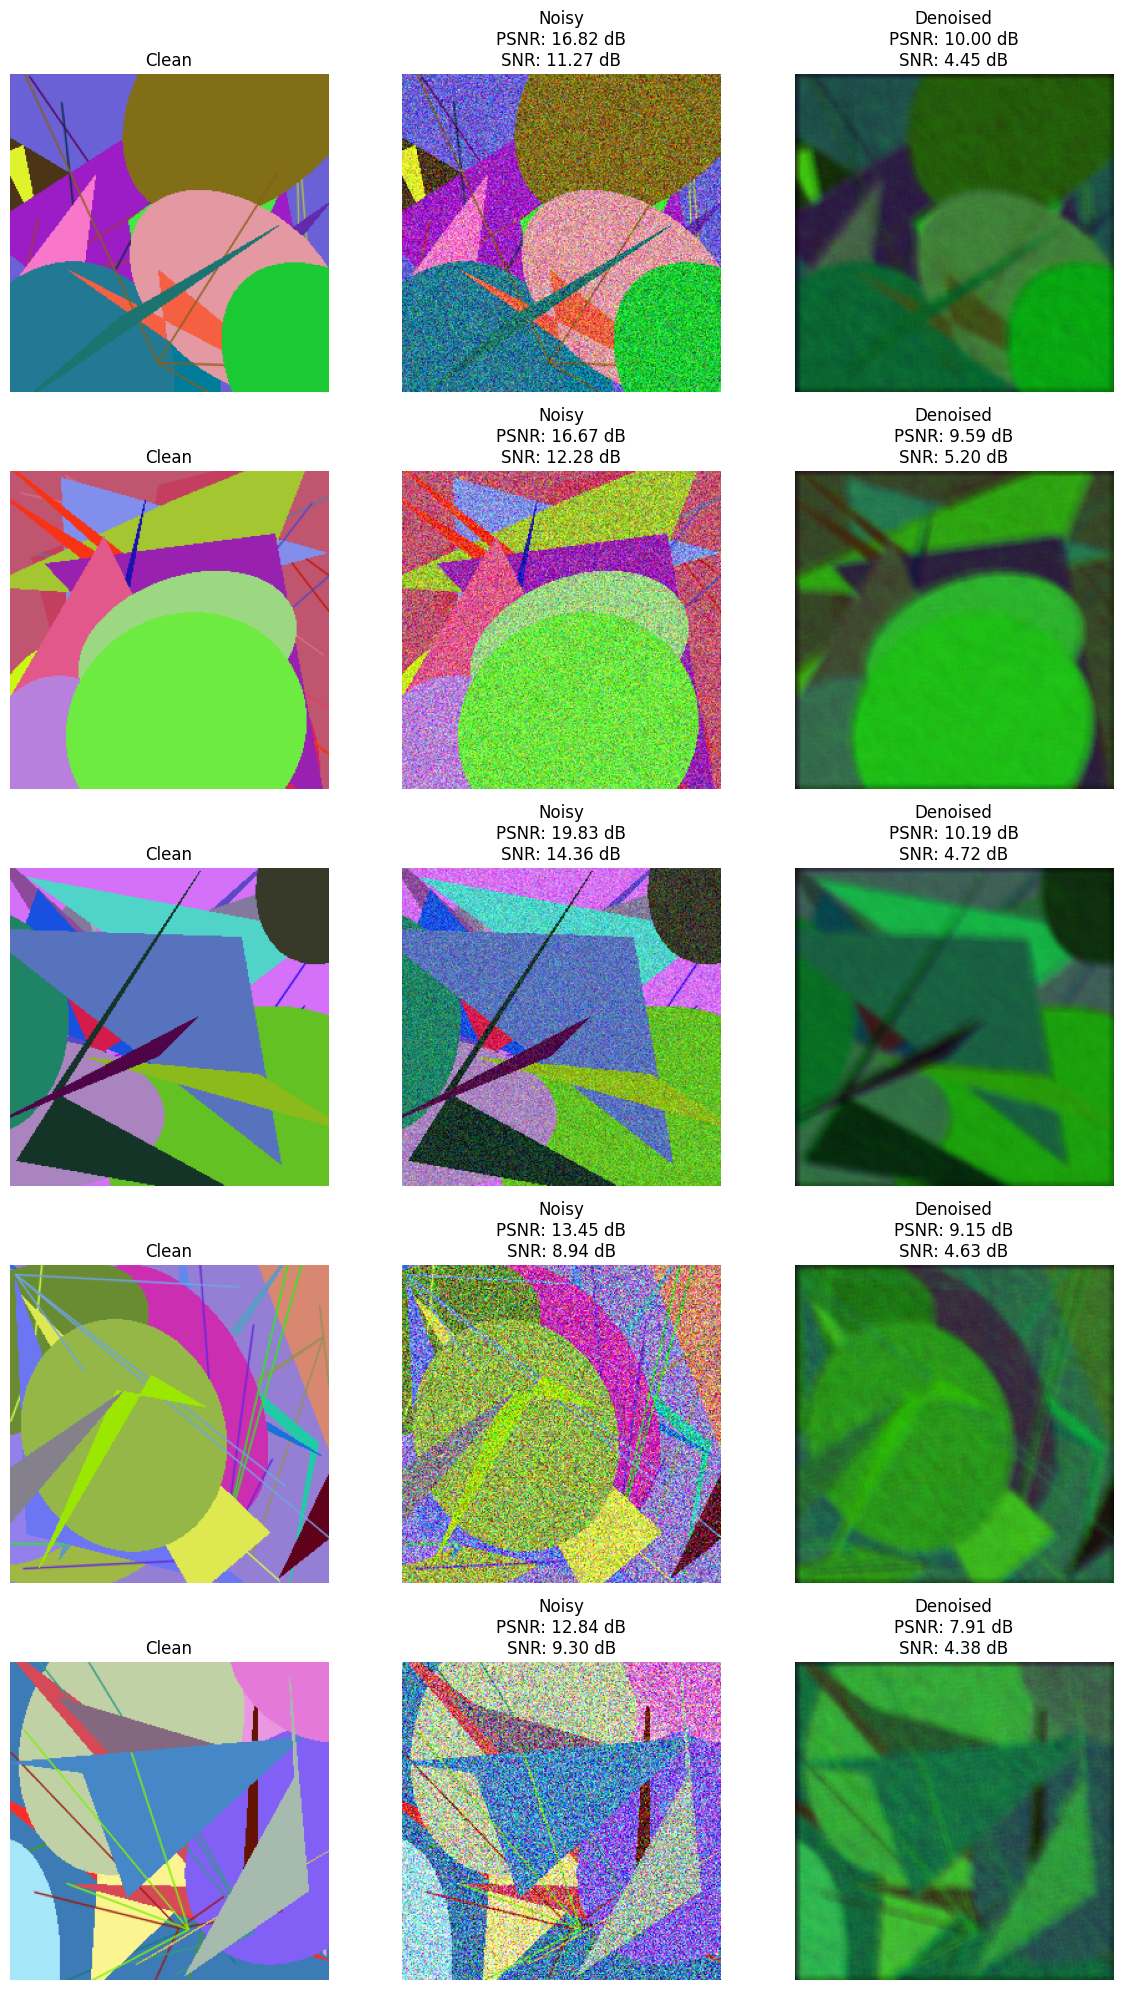

Average PSNR (noisy): 15.922337341308594
Average PSNR (denoised): 9.368144607543945
Average SNR  (noisy): 11.229898834228516
Average SNR  (denoised): 4.675706005096435


In [168]:
# Testiranje
# state = torch.load(model_file_name, map_location=device)
# model.load_state_dict(state)
model.to(device)
model.eval()

num_of_tests = 5

fig, axes = plt.subplots(num_of_tests, 3, figsize=(12, 4 * num_of_tests))

psnr_noisy_list = []
psnr_denoised_list = []
snr_noisy_list = []
snr_denoised_list = []

for i in range(num_of_tests):
    img = generate_image(256, 256, 5, 5, 5, 5)
    clean, noisy, denoised, metrics = nn_test_single(model, img, noise_fn, np.random.uniform(0.1, 0.3), device)

    psnr_noisy_list.append(metrics["psnr_noisy"])
    psnr_denoised_list.append(metrics["psnr_denoised"])
    snr_noisy_list.append(metrics["snr_noisy"])
    snr_denoised_list.append(metrics["snr_denoised"])

    ax0 = axes[i, 0]
    ax1 = axes[i, 1]
    ax2 = axes[i, 2]
    ax0.imshow(clean)
    ax0.set_title("Clean")
    ax0.axis("off")
    ax1.imshow(noisy)
    ax1.set_title(f"Noisy\nPSNR: {metrics['psnr_noisy']:.2f} dB\nSNR: {metrics['snr_noisy']:.2f} dB")
    ax1.axis("off")
    ax2.imshow(denoised)
    ax2.set_title(f"Denoised\nPSNR: {metrics['psnr_denoised']:.2f} dB\nSNR: {metrics['snr_denoised']:.2f} dB")
    ax2.axis("off")

plt.tight_layout()
plt.show()

print("Average PSNR (noisy):", np.mean(psnr_noisy_list))
print("Average PSNR (denoised):", np.mean(psnr_denoised_list))
print("Average SNR  (noisy):", np.mean(snr_noisy_list))
print("Average SNR  (denoised):", np.mean(snr_denoised_list))


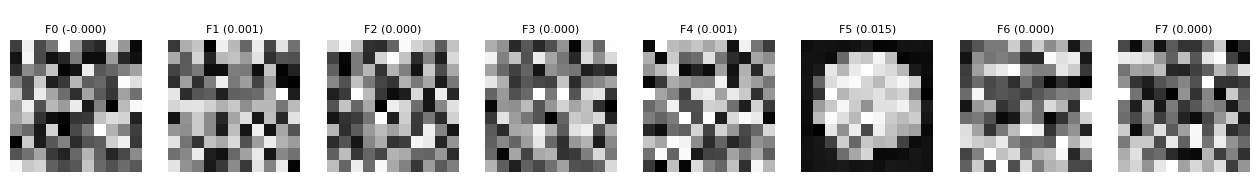

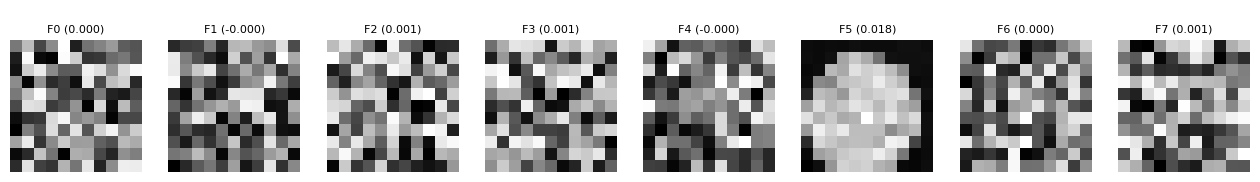

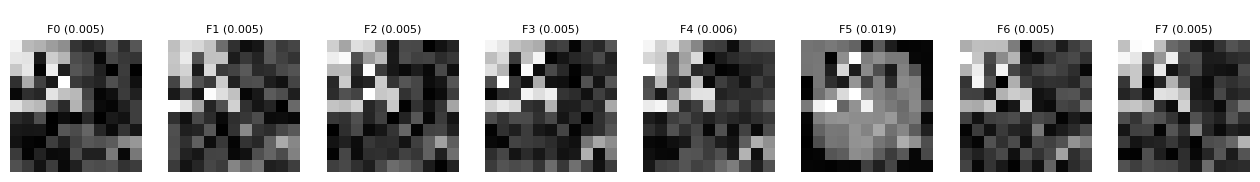

torch.Size([8, 11, 11])


In [169]:
import matplotlib.pyplot as plt


def get_channel_filters(model, channel: str = 'R', show: bool = True):
    fb = model.filter_branch
    if channel == 'R':
        conv = fb.R_conv
    elif channel == 'G':
        conv = fb.G_conv
    elif channel == 'B':
        conv = fb.B_conv
    else:
        raise ValueError("channel mora biti eden izmed: 'R', 'G', 'B'")

    weights = conv.weight.data.cpu().squeeze(1)  # (8, 11, 11)

    if show:
        n_filters = weights.shape[0]
        n_cols = min(8, n_filters)
        n_rows = (n_filters + n_cols - 1) // n_cols

        plt.figure(figsize=(n_cols * 2, n_rows * 2))
        for i in range(n_filters):
            plt.subplot(n_rows, n_cols, i + 1)
            plt.imshow(weights[i], cmap='gray')
            plt.axis('off')
            # Display mean weight value in title
            mean_weight = weights[i].mean().item()
            plt.title(f'F{i} ({mean_weight:.3f})', fontsize=8)
        plt.suptitle(f'FilterBranch – kanal {channel}', color='white')
        plt.show()

    return weights


r_filters = get_channel_filters(model, 'R', show=True)
b_filters = get_channel_filters(model, 'B', show=True)
g_filters = get_channel_filters(model, 'G', show=True)
print(b_filters.shape)


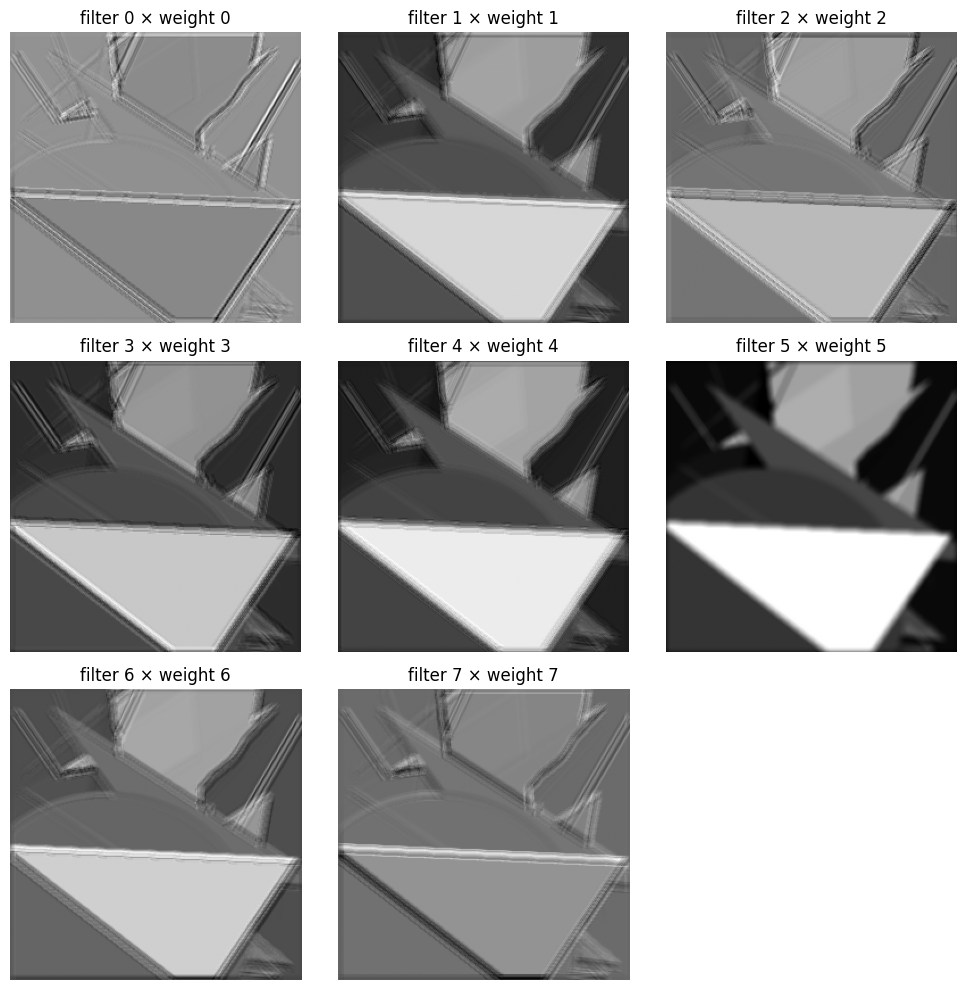

In [170]:
def visualize_filter_weights(model, input_image, device):
    model.eval()
    with torch.no_grad():
        x = torch.tensor(input_image.transpose(2, 0, 1), dtype=torch.float32).unsqueeze(0).to(device) / 255.0
        filtered = model.filter_branch(x)  # (1, 3, 8, H, W)
        weights = model.weight_branch(x)[0]  # (8, H, W)

    R_filtered = filtered[0, 0]

    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()
    for i in range(8):
        weighted_response = R_filtered[i].cpu().numpy() * weights[i].cpu().numpy()
        axes[i].imshow(weighted_response, cmap='gray')
        axes[i].set_title(f'filter {i} × weight {i}')
        axes[i].axis('off')
    axes[8].axis('off')
    plt.tight_layout()
    plt.show()


visualize_filter_weights(model, generate_image(256, 256, 5, 5, 5, 5), device)


In [138]:
# Check current memory
check_gpu_memory()

# Force clear cache
clear_gpu_memory()


GPU Memory Status:
  Allocated: 0.00 GB
  Reserved:  0.00 GB
  Total:     8.59 GB
  Free:      8.59 GB
✅ GPU cache cleared
GPU Memory Status:
  Allocated: 0.00 GB
  Reserved:  0.00 GB
  Total:     8.59 GB
  Free:      8.59 GB


In [23]:
import pickle


def check_dataset(checkpoint_dir, num_samples, noise_fn):
    dataset_path = os.path.join(checkpoint_dir, "dataset.pkl")

    # ✅ Ensure checkpoint directory exists
    os.makedirs(checkpoint_dir, exist_ok=True)

    # 🔄 Load existing dataset if available
    if os.path.exists(dataset_path):
        with open(dataset_path, "rb") as f:
            train_dataset_noise_add = pickle.load(f)
        print(f"📦 Loaded existing dataset from {dataset_path}")
    else:
        # Initialize new dataset
        train_dataset_noise_add = SyntheticNoiseDataset(num_samples=num_samples, noise_fn=noise_fn)
        # Save it for future resumes
        with open(dataset_path, "wb") as f:
            pickle.dump(train_dataset_noise_add, f)
        print(f"📦 Saved new dataset to {dataset_path}")

    return train_dataset_noise_add

In [ ]:
clear_gpu_memory()

# Train noise_add
num_epochs_noise_add = 100000
model_name_noise_add = f"denoiser_ep{num_epochs_noise_add}_{noise_add.__name__}.pth"
checkpoint_dir_noise_add = "checkpoints-noise_add"

# train_dataset_noise_add = SyntheticNoiseDataset(num_samples=num_samples, noise_fn=noise_add)
train_dataset_noise_add = check_dataset(checkpoint_dir_noise_add, num_samples, noise_add)
train_loader_noise_add = DataLoader(train_dataset_noise_add, batch_size=batch_size, shuffle=True, num_workers=0)

# nn_train(model, num_epochs_noise_add, model_name_noise_add, train_loader_noise_add)
nn_train(
    model=model,
    num_epochs=num_epochs_noise_add,
    model_file_name=model_name_noise_add,
    train_loader=train_loader_noise_add,
    optimizer=optimizer,
    criterion=criterion,
    checkpoint_dir=checkpoint_dir_noise_add
)

clear_gpu_memory()

# # Train noise_mul
# num_epochs_noise_mul = 100000
# model_name_noise_mul = f"denoiser_ep{num_epochs_noise_mul}_{noise_mul.__name__}.pth"
# checkpoint_dir_noise_mul = "checkpoints-noise_mul"
#
# # train_dataset_noise_mul = SyntheticNoiseDataset(num_samples=num_samples, noise_fn=noise_mul)
# train_dataset_noise_mul = check_dataset(checkpoint_dir_noise_mul, num_samples, noise_mul)
# train_loader_noise_mul = DataLoader(train_dataset_noise_mul, batch_size=batch_size, shuffle=True, num_workers=0)
#
# # nn_train(model, num_epochs_noise_mul, model_name_noise_mul, train_loader_noise_mul)
# nn_train(
#     model=model,
#     num_epochs=num_epochs_noise_mul,
#     model_file_name=model_name_noise_mul,
#     train_loader=train_loader_noise_mul,
#     optimizer=optimizer,
#     criterion=criterion,
#     checkpoint_dir="checkpoints-noise_mul"
# )

✅ GPU cache cleared
GPU Memory Status:
  Allocated: 0.00 GB
  Reserved:  0.00 GB
  Total:     8.59 GB
  Free:      8.59 GB
📦 Loaded existing dataset from checkpoints-noise_add\dataset.pkl
✅ Resuming from checkpoint: checkpoints-noise_add\checkpoint_epoch_27000.pth (epoch 27000)


Epoch 27001/100000: 100%|██████████| 25/25 [00:05<00:00,  4.54it/s]


Epoch 27001 - Avg loss: 21359.370859


Epoch 27002/100000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 27002 - Avg loss: 21359.371250


Epoch 27003/100000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 27003 - Avg loss: 21359.371484


Epoch 27004/100000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 27004 - Avg loss: 21359.371094


Epoch 27005/100000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 27005 - Avg loss: 21359.371250


Epoch 27006/100000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 27006 - Avg loss: 21359.370781


Epoch 27007/100000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 27007 - Avg loss: 21359.370937


Epoch 27008/100000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 27008 - Avg loss: 21359.371406


Epoch 27009/100000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 27009 - Avg loss: 21359.371406


Epoch 27010/100000: 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


Epoch 27010 - Avg loss: 21359.371094


Epoch 27011/100000: 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


Epoch 27011 - Avg loss: 21359.371406


Epoch 27012/100000: 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


Epoch 27012 - Avg loss: 21359.370937


Epoch 27013/100000: 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


Epoch 27013 - Avg loss: 21359.371406


Epoch 27014/100000: 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


Epoch 27014 - Avg loss: 21359.371328


Epoch 27015/100000:  32%|███▏      | 8/25 [00:01<00:03,  4.72it/s]

In [167]:
def load_model_from_checkpoint(checkpoint_path, model_class, device="cpu"):
    if not os.path.exists(checkpoint_path):
        raise FileNotFoundError(f"Checkpoint not found: {checkpoint_path}")

    checkpoint = torch.load(checkpoint_path, map_location=device)

    # Instantiate model
    model = model_class()
    model.load_state_dict(checkpoint["model_state_dict"])
    model.to(device)

    epoch = checkpoint.get("epoch", 0)
    loss = checkpoint.get("loss", None)

    print(f"✅ Loaded model from {checkpoint_path} (epoch {epoch})")
    return model, epoch, loss

# Example usage:
model_loaded, start_epoch, last_loss = load_model_from_checkpoint(
    "checkpoints-noise_add/checkpoint_epoch_16000.pth",
    EdgePreservingDenoiser,
    device=device,
)

model = model_loaded

✅ Loaded model from checkpoints-noise_add/checkpoint_epoch_16000.pth (epoch 16000)
